<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [109]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-10-01 18:39:22--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.3’

m4_survey_data.sqli 100%[===================>]  34.98M  40.7MB/s    in 0.9s    

2024-10-01 18:39:23 (40.7 MB/s) - ‘m4_survey_data.sqlite.3’ saved [36679680/36679680]



Connect to the database.


In [110]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [111]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

## Demo: How to run an sql query


In [113]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [114]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [115]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [116]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [117]:
# your code goes here

QUERY = """
SELECT ConvertedComp
FROM master
"""
ConvertedComp_df=pd.read_sql_query(QUERY,conn)


<AxesSubplot:ylabel='Frequency'>

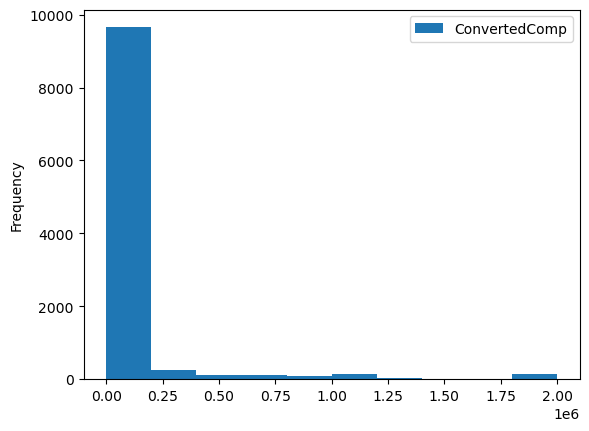

In [118]:
ConvertedComp_df.plot.hist()

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

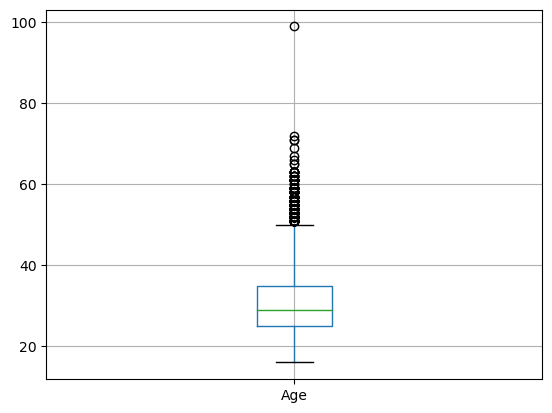

In [119]:
# your code goes here

QUERY = """
SELECT Age
FROM master
"""
Age_df=pd.read_sql_query(QUERY,conn)
Age_df.boxplot()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

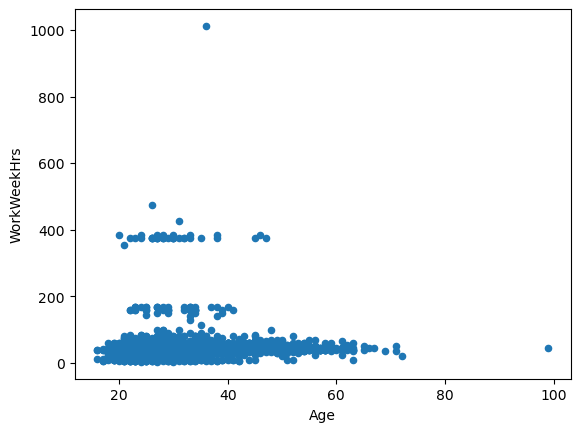

In [120]:
# your code goes here

QUERY = """
SELECT Age,WorkWeekHrs
FROM master
"""
Age_WorkWeekHrs_df=pd.read_sql_query(QUERY,conn)
Age_WorkWeekHrs_df.plot.scatter(x='Age',y='WorkWeekHrs')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

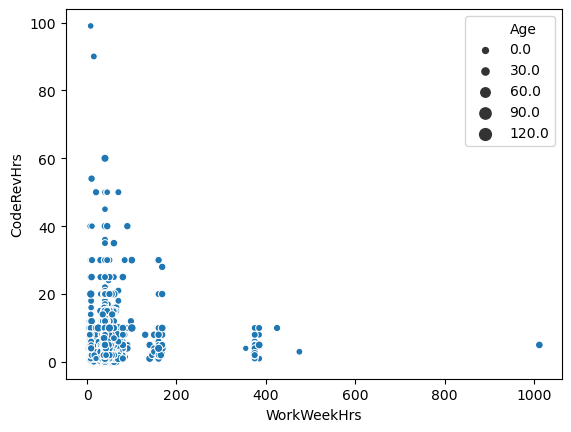

In [121]:
# your code goes here

QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
"""
Age_WorkWeekHrs_CodeRevHrs_df=pd.read_sql_query(QUERY,conn)
#Age_WorkWeekHrs_CodeRevHrs_df.plot.scatter(x='WorkWeekHrs',y='CodeRevHrs',s='Age')
sns.scatterplot(data=Age_WorkWeekHrs_CodeRevHrs_df,x='WorkWeekHrs',y='CodeRevHrs',size='Age')

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


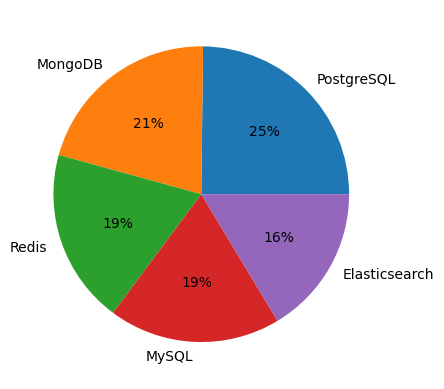

In [122]:
# your code goes here
QUERY = """
SELECT DatabaseDesireNextYear,COUNT(*) as count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count desc
LIMIT 5
"""
DatabaseDesireNextYear_df=pd.read_sql_query(QUERY,conn)
plt.pie(DatabaseDesireNextYear_df['count'],labels=DatabaseDesireNextYear_df['DatabaseDesireNextYear'],autopct='%.0f%%')
plt.show()

In [123]:
QUERY = """
SELECT LanguageDesireNextYear,COUNT(*) as count
FROM LanguageDesireNextYear
group by LanguageDesireNextYear
order by count desc
LIMIT 10
"""
LanguageDesireNextYear_df=pd.read_sql_query(QUERY,conn)

LanguageDesireNextYear_df

,LanguageDesireNextYear,count
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088
5,C#,3591
6,Bash/Shell/PowerShell,3097
7,Java,2953
8,Go,2759
9,Kotlin,1890


In [124]:
QUERY = """
SELECT LanguageWorkedWith,COUNT(*) as count
FROM LanguageWorkedWith
group by LanguageWorkedWith
order by count desc
LIMIT 10
"""
LanguageWorkedWith_df=pd.read_sql_query(QUERY,conn)

LanguageWorkedWith_df

,LanguageWorkedWith,count
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542
5,Java,4506
6,C#,4288
7,TypeScript,3232
8,PHP,2913
9,C++,1946


In [125]:
QUERY = """
SELECT DatabaseWorkedWith, COUNT(*) as count
FROM DatabaseWorkedWith
where Respondent in (SELECT Respondent FROM DatabaseWorkedWith group by Respondent HAVING COUNT(*) = 1)
AND DatabaseWorkedWith= 'MySQL'
group by DatabaseWorkedWith

"""


DatabaseWorkedWith_MySQL=pd.read_sql_query(QUERY,conn)
DatabaseWorkedWith_MySQL


,DatabaseWorkedWith,count
0,MySQL,474


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


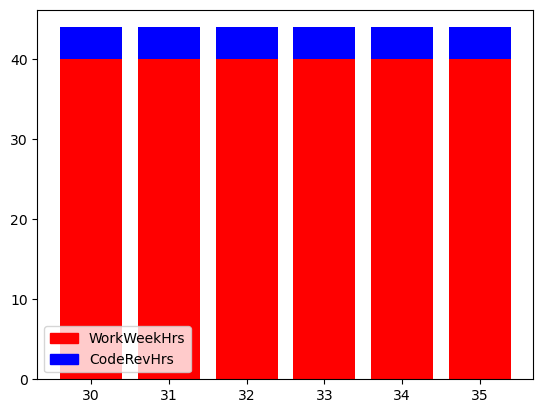

In [130]:
# your code goes here

QUERY = """
SELECT WorkWeekHrs,CodeRevHrs,Age
FROM master
where Age between 30 AND 35
"""
WorkWeekHrs_CodeRevHrs_df=pd.read_sql_query(QUERY,conn)
WorkWeekHrs_CodeRevHrs_df_median=WorkWeekHrs_CodeRevHrs_df.groupby(['Age'])[['WorkWeekHrs','CodeRevHrs']].median()
red_patch = mpatches.Patch(color='red', label='WorkWeekHrs')
blue_patch = mpatches.Patch(color='blue', label='CodeRevHrs')
plt.legend(handles=[red_patch])
plt.bar(WorkWeekHrs_CodeRevHrs_df_median.index,WorkWeekHrs_CodeRevHrs_df_median['WorkWeekHrs'],color='r')
plt.bar(WorkWeekHrs_CodeRevHrs_df_median.index,WorkWeekHrs_CodeRevHrs_df_median['CodeRevHrs'],bottom=WorkWeekHrs_CodeRevHrs_df_median['WorkWeekHrs'],color='b')
plt.legend(handles=[red_patch,blue_patch])
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age'>

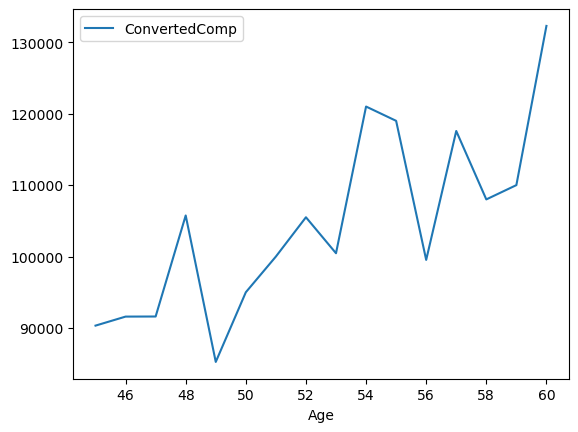

In [60]:
# your code goes here

QUERY = """
SELECT ConvertedComp,Age
FROM master
where Age between 45 AND 60
"""
ConvertedComp_Age_df=pd.read_sql_query(QUERY,conn)
ConvertedComp_Age_df_median=ConvertedComp_Age_df.groupby('Age').median()
ConvertedComp_Age_df_median=ConvertedComp_Age_df_median.reset_index()

ConvertedComp_Age_df_median.plot.line('Age','ConvertedComp')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<AxesSubplot:ylabel='MainBranch'>

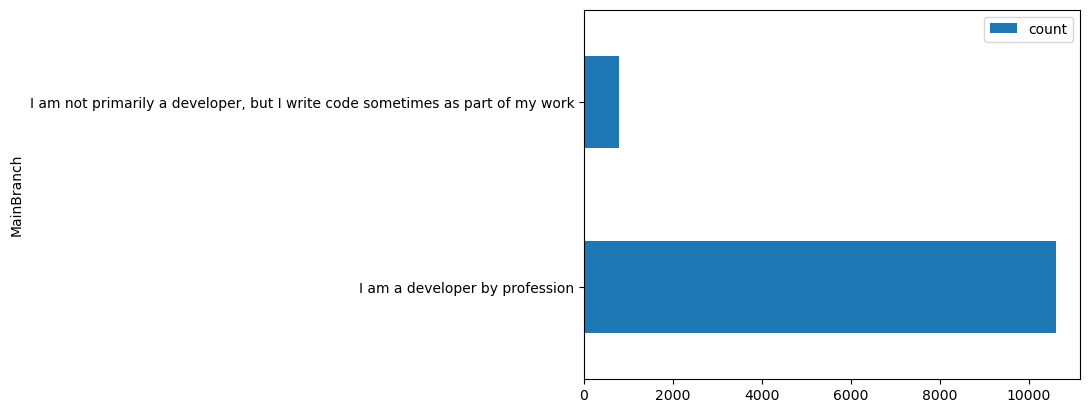

In [66]:
# your code goes here
QUERY = """
SELECT MainBranch,COUNT(*) as count
FROM master
group by MainBranch
"""
MainBranch_df=pd.read_sql_query(QUERY,conn)
MainBranch_df.plot.barh('MainBranch','count')

In [133]:

QUERY = """
SELECT DevType,COUNT(*) as count
FROM DevType
group by DevType
order by count desc
"""
pd.read_sql_query(QUERY,conn)

,DevType,count
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


Close the database connection.


In [107]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
